# Introduction

<div class="alert alert-block alert-warning">
<font color=black><br>

**What?** Use and remove trends in a time series

<br></font>
</div>

# Import modules

In [7]:
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
import numpy
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl

rcParams['figure.figsize'] = 15, 5
rcParams['font.size'] = 20

# Import dataset

In [5]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('../DATASETS/shampoo.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)

X = series.values

# Detrend by differencing

<div class="alert alert-block alert-info">
<font color=black><br>

- The simplest method to detrend a time series is by differencing. 
- Specifically, a new series is constructed where the value at the current time step is calculated as the difference between the original observation and the observation at the previous time step.
- As we'll see below we have removed the upwards trend.

<br></font>
</div>

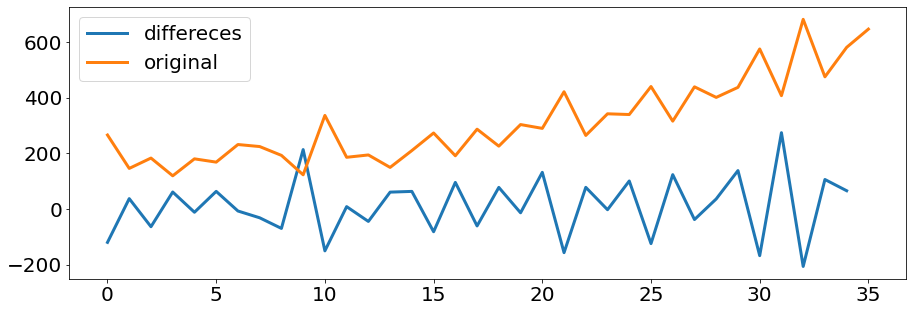

In [12]:
diff = list()

for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)
    
pyplot.plot(diff, lw = 3, label = "differeces")
pyplot.plot(X, lw = 3, label = "original")
pyplot.legend()
pyplot.show()

# Detrend by Model Fitting

<div class="alert alert-block alert-info">
<font color=black><br>

- A trend is often easily visualized as a line through the observations. 
- Linear trends can be summarized by a linear model, and nonlinear trends may be best summarized using a polynomial or other curve-fitting method.

<br></font>
</div>

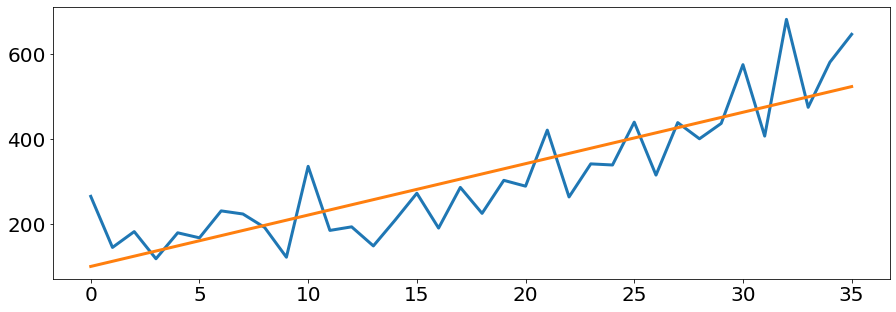

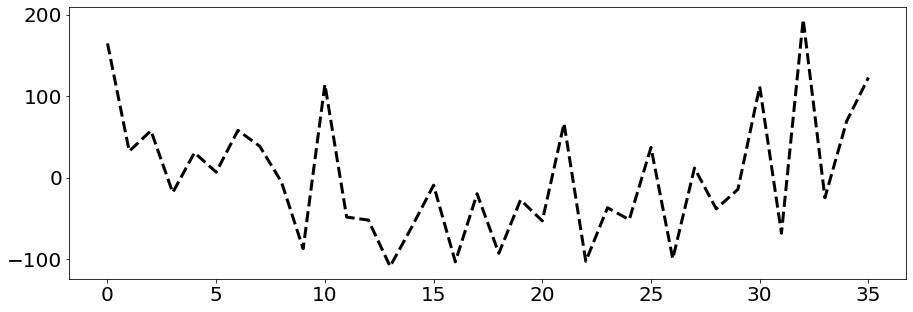

In [17]:
# fit linear model
X = [i for i in range(0, len(series))]
X = numpy.reshape(X, (len(X), 1))
y = series.values
model = LinearRegression()
model.fit(X, y)

# calculate trend
trend = model.predict(X)

# plot trend
pyplot.plot(y, lw = 3)
pyplot.plot(trend, lw = 3)
pyplot.show()

# Detrend by a linear model
detrended = [y[i]-trend[i] for i in range(0, len(series))]

# plot detrended
pyplot.plot(detrended, "k--", lw = 3)
pyplot.show()

# References

<div class="alert alert-warning">
<font color=black>

- https://machinelearningmastery.com/?s=time+series&post_type=post&submit=Search

</font>
</div>